In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import normalvariate

In [5]:
#伪随机数
#numpy.random模块对py内置的random进行了补充，用于从多种概率分布中有效地生成整个样本值数组
#可以用numpy.normal得到一个标准正态分布的4✖️4样本数组
samples = np.random.standard_normal(size=(4, 4))
samples

array([[-1.61184926, -0.41066663, -1.83052292,  0.49091556],
       [-0.36929447,  0.71084084,  0.03803592,  0.23008066],
       [-0.39249345, -0.84746294, -1.17744278, -0.30044961],
       [ 0.73086453,  0.04997405, -0.565764  , -0.37784494]])

In [6]:
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

304 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


normalvariate 函数用于生成服从正态分布（也称高斯分布）的随机样本。
它的特点是呈现钟形曲线，两端对称，中间最高。
正态分布可以由其均值（mean）和标准差（standard deviation）完全描述。
正态分布是一种连续概率分布，意味着变量可以取任意实数值，而不是离散的数值。
在实际应用中，我们通常会对正态分布进行抽样，从而得到一系列离散的观测值。

In [7]:
#%timeit np.random.standard_normal(N)

15.2 ms ± 135 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


%timeit 魔法命令是在 IPython 或 Jupyter Notebooks 中用于测量小块 Python 代码执行时间的工具。
它提供了一种简单的办法来基准测试你的代码性能。
%timeit 魔法命令是 IPython 或 Jupyter Notebooks 特有的，并且在普通 Python 脚本中不可用。
如果你在普通 Python 脚本中，你可以使用 timeit 模块

In [7]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))
type(rng)

numpy.random._generator.Generator

numpy 库提供了一个名为 np.random.default_rng 的函数，用于创建一个随机数生成器（也称为随机数发生器或RNG）。
可以通过指定种子（seed）来初始化这个生成器，这样可以确保每次代码运行时生成的随机数序列是相同的。
rng 是一个随机数生成器对象，它被初始化为具有指定种子 12345 的默认生成器。
使用这个生成器通过 standard_normal 方法生成了一个2行3列的标准正态分布矩阵，
这意味着矩阵中的每个元素都是从均值为0、标准差为1的正态分布中抽取的随机样本。

numpy.random.Generator这个类提供了一个随机数生成器的接口，用于生成各种分布的随机样本。
Generator 类是线程安全的，这意味着它可以在多线程环境中安全地使用，而不会导致随机数生成器的状态被多个线程同时修改。

Generator 类的一些主要方法包括：

standard_normal: 生成服从标准正态分布（均值为0，标准差为1）的随机样本。
uniform: 生成服从均匀分布的随机样本。
randint: 生成服从整数均匀分布的随机样本。
poisson: 生成服从泊松分布的随机样本。
normal: 生成服从正态分布的随机样本。
chisquare: 生成服从卡方分布的随机样本。
rayleigh: 生成服从瑞利分布的随机样本。
exponential: 生成服从指数分布的随机样本。

![jupyter](./4.8.PNG)

In [9]:
#通用函数：快速的元素级数组函数 ufunc 
#许多通用函数可以用于简单的元素转换。如numpy.sqrt numpy.exp
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [11]:
#二元ufunc，返回数组为结果
x = rng.standard_normal(8)
y = rng.standard_normal(8)
x

array([-1.3677927 ,  0.6488928 ,  0.36105811, -1.95286306,  2.34740965,
        0.96849691, -0.75938718,  0.90219827])

In [12]:
y

array([-0.46695317, -0.06068952,  0.78884434, -1.25666813,  0.57585751,
        1.39897899,  1.32229806, -0.29969852])

In [13]:
np.maximum(x, y)

array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

In [14]:
#返回多个数组  numpy.modf返回浮点数数组的小数部分和整数部分：
arr = rng.standard_normal(7) * 5
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [15]:
remainder, whole_part = np.modf(arr)
remainder

array([ 0.51459671, -0.10791367, -0.7909463 ,  0.24741966, -0.71800536,
       -0.40843795,  0.62369966])

In [16]:
whole_part

array([ 4., -8., -0.,  2., -6., -0.,  8.])

np.modf 函数用于取一个浮点数或一个浮点数数组，并返回两个数组：
第一个数组包含数字的分数部分，第二个数组包含整数部分。
remainder, whole_part：该函数返回两个数组，
remainder 数组将包含 arr 中每个元素的分数部分，而 whole_part 数组将包含每个元素的整数部分。

In [17]:
#ufunc可以接收一个out可选参数，这样就能对存在的数值直接赋值，而不必建立数组
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [18]:
out = np.zeros_like(arr)
np.add(arr, 1)

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

np.zeros_like(arr)：这个函数创建了一个与 arr 具有相同形状和数据类型的新的 NumPy 数组，并用零填充。
换句话说，它创建了一个结构与 arr 相同但所有元素都设置为零的数组。
out：这个变量存储了 np.zeros_like 函数调用的结果。
现在它包含了一个 arr 的副本，所有元素都被设置为零。
np.add(arr, 1)：这个函数执行 arr 和数组 1 的逐元素加法。
arr 中的每个元素都加1，结果存储在 np.add 函数返回的数组中。
如果没有人显式提供输出数组，np.add 默认返回修改后的输入数组。

In [19]:
np.add(arr, 1, out=out)

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

In [ ]:
out=out：这是 np.add 函数的一个参数，它告诉 NumPy 将加法操作的结果存储在变量 out 中。
这意味着 out 数组将被修改，以包含 arr 每个元素加 1 后的结果。

In [36]:
out

array([-2.41956609, -2.60418834,  6.60311408,  0.7259292 ,  0.58793138,
        5.6799325 ,  7.19268562])

Numpy中的一元通用函数和二元通用函数

![jupyter](./4.9.png)

![jupyter](./4.10.png)

![jupyter](./4.11.png)

Numpy数组可以将许多数据处理任务表述为简洁的数组表达式，无需循环。
数组表达式代替循环通常是向量化
向量化数组运算要比纯python快得多，尤其计算

In [20]:
#利用数组进行面向数组编程
#在一组网格数据上计算函数sqrt(x^2+y^2).  
#numpy.meshgrid函数接收两个一维数组，并产生两个二维矩阵，对应于两个数组中所有的(x, y)对：
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

np.meshgrid(points, points)：这个 NumPy 函数会创建两个二维矩阵，xs 和 ys。
这两个矩阵分别是 points 矩阵的横坐标和纵坐标版本。
np.meshgrid 会将 points 沿着第一个轴（行）和第二个轴（列）进行扩展，以生成两个网格。
这两个网格对应于 points 中的每个点对，xs 中的每一行对应于 ys 中的每一列。

In [21]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

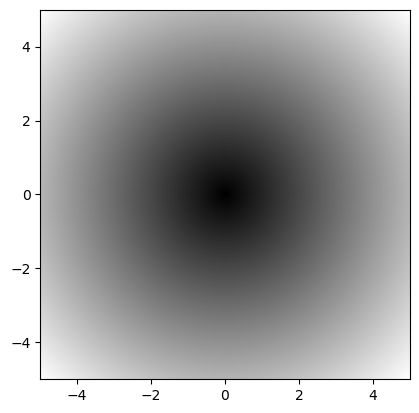

In [9]:
#网格上对函数求值的结果
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])

In [22]:
#numpy.where函数是三元表达式
#假设有一个bool数组和两个值数组
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

#根据cond中的值选取xarr和yarr的值，当cond中的值为True时，选取xarr的值，否则选yarr
result = [(x if c else y)
           for x, y , c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

代码缺点：对大数组处理速度慢，且无法用于多维
(x if c else y)：这是一个条件表达式，也称为三元运算符。它是一个简洁的条件语句，形式为value_if_true if condition else value_if_false。在这个表达式中：
如果c为True，则表达式的结果是x。
如果c为False，则表达式的结果是y。
if c:
    result = x
else:
    result = y

In [23]:
#用numpy.where则一次调用就可以执行
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

numpy.where(condition, x, y)
condition是一个bool数组，指示哪些位置应该使用x，哪些位置应该使用y。
x和y是任意形状的数组，用于指定在condition为True和False时的输出。
np.where函数会返回一个数组，其中condition为True的位置使用x的值，为False的位置使用y的值。

In [24]:
#用处：where常用于根据另一个数组而产生一个新的数组。
#假设有一个随机数据生成的矩阵，希望所有正值替换为2，所有负值替换为-2
arr = rng.standard_normal((4, 4))
arr

array([[ 2.61815943,  0.77736134,  0.8286332 , -0.95898831],
       [-1.20938829, -1.41229201,  0.54154683,  0.7519394 ],
       [-0.65876032, -1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.26998312, -0.09296246, -0.06615089]])

In [25]:
arr > 0

array([[ True,  True,  True, False],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False,  True, False, False]])

In [26]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2]])

In [27]:
#可以将标量和数组结合起来，如可以替换arr中所有正值
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        ,  2.        , -0.95898831],
       [-1.20938829, -1.41229201,  2.        ,  2.        ],
       [-0.65876032, -1.22867499,  2.        ,  2.        ],
       [-0.13081169,  2.        , -0.09296246, -0.06615089]])

In [28]:
#sum、mean、std等聚合约减运算既作为数组的实例方法调用，又可以直接使用numpy
arr = rng.standard_normal((5, 4))
arr

array([[-1.10821447,  0.13595685,  1.34707776,  0.06114402],
       [ 0.0709146 ,  0.43365454,  0.27748366,  0.53025239],
       [ 0.53672097,  0.61835001, -0.79501746,  0.30003095],
       [-1.60270159,  0.26679883, -1.26162378, -0.07127081],
       [ 0.47404973, -0.41485376,  0.0977165 , -1.64041784]])

In [29]:
arr.mean()

-0.08719744457434529

In [30]:
np.mean(arr)

-0.08719744457434529

In [31]:
arr.sum()

-1.743948891486906

In [32]:
#mean和sum等函数可以接收一个axis可选参数，可以计算该轴上的统计值，最终是一个一维的低维数组
arr.mean(axis=1)

array([ 0.10899104,  0.3280763 ,  0.16502112, -0.66719934, -0.37087634])

In [ ]:
mean函数用于计算数组arr沿指定轴的平均值。当axis=1时，意味着我们要计算数组每一列的平均值。
如果arr是一个二维数组，那么这将返回一个一维数组，其中包含了每一列的平均值。
[[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]]
arr.mean(axis=1)则返回
[2., 5., 8.]
这意味着第一列的平均值是2，第二列的平均值是5，第三列的平均值是8。

In [33]:
arr.sum(axis=0)

array([-1.62923076,  1.03990647, -0.33436331, -0.82026129])

In [ ]:
sum函数用于计算数组arr沿指定轴的总和。当axis=0时，意味着我们要计算数组每一行的总和。
如果arr是一个二维数组，那么这将返回一个一维数组，其中包含了每一行的总和。
[[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]]
arr.mean(axis=1)则返回
[12, 15, 18]
这意味着第一行的总和是12，第二行的总和是15，第三行的总和是18。

In [34]:
#相同的，mean函数也可以接收可选参数，计算该轴上的值，最终结果是一个低一维的数组
arr.mean(axis=1)

array([ 0.10899104,  0.3280763 ,  0.16502112, -0.66719934, -0.37087634])

arr.mean(1)的意思是“计算行的平均值”，arr.sum(0)是“计算每列的和”

In [35]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7,])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [ ]:
cumsum和cumprod不会把数聚合起来，而是累加，产生一个由中间结果组成的数组
多维数组中，累加函数cumsum返回的是同样大小的数组，但是可以在指定轴向上根据每个较低维度的切片进行部分聚类

In [36]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [37]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

arr.cumsum(axis=0)计算的是（每行）竖着累加,0+3+6=9，1+4+7=12，2+5+8=15
arr.cumsum(axis=1)计算的是（每列）横着加,0+1+2=3，3+4+5=12，6+7+8=21

In [38]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

后期会大量用到此类方法

![jupyter](./4.12.png)

In [39]:
#bool类型的用处：强制转换为0或1，利用sum求数组中正确的个数：
arr = rng.standard_normal(100)
(arr > 0).sum()

48

In [41]:
(arr <= 0).sum()

52

In [43]:
#bool类型还有any和all的用法，any用于检查存在一个或多个True
#all则是检查数组中的所有值是否都为True
#在非bool型数组中也可以用来判断，非0元素都为True
bools = np.array([True, False, True, False])
bools.any()

True

In [44]:
bools.all()

False

In [45]:
#排序
arr = rng.standard_normal(6)
arr

array([ 0.07726066, -0.68391322, -0.72083767,  1.12062282, -0.05481416,
       -0.08241372])

In [47]:
arr.sort()
arr

array([-0.72083767, -0.68391322, -0.08241372, -0.05481416,  0.07726066,
        1.12062282])

In [8]:
#多维数组可以在任何一个轴上对一维数组进行排序，只需要将轴编号传给sort即可
arr = rng.standard_normal((5, 3))
arr

array([[-1.3677927 ,  0.6488928 ,  0.36105811],
       [-1.95286306,  2.34740965,  0.96849691],
       [-0.75938718,  0.90219827, -0.46695317],
       [-0.06068952,  0.78884434, -1.25666813],
       [ 0.57585751,  1.39897899,  1.32229806]])

In [10]:
#对矩阵的列行进行排序
arr.sort(axis=0)
arr

array([[-1.95286306,  0.6488928 , -1.25666813],
       [-1.3677927 ,  0.78884434, -0.46695317],
       [-0.75938718,  0.90219827,  0.36105811],
       [-0.06068952,  1.39897899,  0.96849691],
       [ 0.57585751,  2.34740965,  1.32229806]])

In [12]:
arr.sort(axis=1)
arr

array([[-1.95286306, -1.25666813,  0.6488928 ],
       [-1.3677927 , -0.46695317,  0.78884434],
       [-0.75938718,  0.36105811,  0.90219827],
       [-0.06068952,  0.96849691,  1.39897899],
       [ 0.57585751,  1.32229806,  2.34740965]])

In [13]:
#numpy.sort返回的是已排序数组的副本，类似于py中的sorted，不是修改数组
arr2 = np.array([5, -10, 7, 1, 0 ,-3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

In [14]:
arr2

array([  5, -10,   7,   1,   0,  -3])

更多高级排序方法在numpy高级中

In [16]:
#唯一化和其他集合逻辑   对一维数组的基本运算
#np.unique,找出数组唯一值并返回已排序的结果
names = np.array(['Bob', "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

dtype='<U4'表示这个数组中的字符串长度都小于4，并且返回的结果都是按字符串长度进行排序

In [17]:
ints = np.array([3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [20]:
#numpy和等价的纯py进行对比
set(names)

{'Bob', 'Joe', 'Will'}

In [21]:
sorted(set(names))

['Bob', 'Joe', 'Will']

set函数用于创建一个无序且不重复的集合，set还会将数组转化为集合
numpy更快，并且返回的是一个数组而非py列表

In [22]:
#numpy.in1d
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

numpy.in1d用于检查一个数组中的值是否在另一个数组中，并返回一个bool型数组

numpy的数组集合函数：

![jupyter](./4.13.png)

In [23]:
#用数组进行文件输入输出
#numpy.save 和 numpy.load是读写磁盘数组的两个主要函数。一般都是以未压缩的二进制存储在.npy的文件中
arr = np.arange(10)
np.save("some_array", arr)

文件末尾没有扩展名.npy，则该扩展名会自动加上，然后就可以通过np.load读取磁盘上的数组了

In [24]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
#numpy.savez 可以将多个数组保存到一个未压缩的文件中，将数组以关键字参数的形式传入即可
np.savez("array_archive.npz", a=arr, b=arr)
arch = np.load("array_archive.npz")
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

np.savez 函数用于将多个 NumPy 数组保存到单个压缩文件中，每个数组可以作为一个字典条目。
这样的文件通常以 .npz 扩展名结尾。
np.savez("array_archive.npz", a=arr, b=arr)
创建了一个名为 array_archive.npz 的文件，其中包含了两个数组 a 和 b。
这两个数组被存储在文件的字典中，其中 a 和 b 是键，对应的数组值是值。
arch 变量是一个字典，它的键是之前存储的键（在这个例子中是 'a' 和 'b'），而值是对应的数组。
当执行 arch["b"] 时，你实际上是在获取之前存储为 'b' 的数组。
所以前面定义了arr = np.arange(10)，此时arr数组就是现在输出的结果
即arch["b"] 表示加载自 .npz 文件的键为 'b' 的数组。
若是在此时定义为b_loaded = arch["b"]，对b_loaded进行修改不会对原数组进行破坏，这个数组对于原数组arr是独立的

In [27]:
#如果要将数据存入已压缩的文件，可以使用numpy.save_compressed
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)